In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [26]:
img = cv2.imread("image.jpg")
plt.imshow(img)

Error in callback <function flush_figures at 0x7f762d68b0> (for post_execute):


KeyboardInterrupt: 

[[[10  5]]

 [[20 30]]

 [[70 20]]

 [[50 10]]]


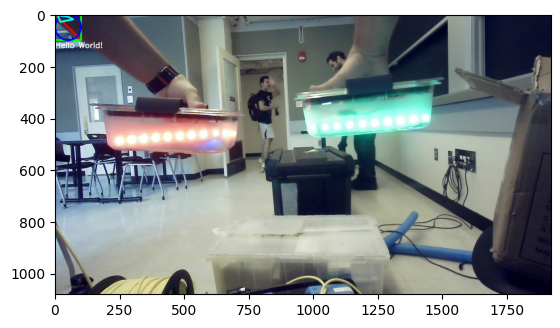

In [ ]:
cv2.line(img, (0, 0), (100, 100), (255, 0, 0), 5)
cv2.rectangle(img, (0, 0), (100, 100), (0, 255, 0), 5)
cv2.circle(img, (50, 50), 50, (0, 0, 255), 5)

pts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
pts = pts.reshape((-1, 1, 2))

cv2.polylines(img, [pts], True, (0, 255, 255), 5)
cv2.putText(
    img,
    "Hello World!",
    (0, 130),
    cv2.FONT_HERSHEY_SIMPLEX,
    1,
    (255, 255, 255),
    2,
    cv2.LINE_AA,
)

plt.imshow(img)

In [2]:
# Debug


def find_pool_lanes(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # convert to grayscale
    edges = cv2.Canny(gray, 40, 50, apertureSize=3)  # detect edges
    lines = cv2.HoughLinesP(
        edges,
        1,
        np.pi / 360,
        100,
        minLineLength=400,
        maxLineGap=100,
    )  # detects lines

    # Sets the tolerance for comparing lines using slope and y-intercept
    m_tol = 5e-2
    b_tol = 5e2

    center_x = img.shape[1] / 2
    limit_y = 2 * img.shape[0] / 3

    filtered_lines = []

    for line in lines:
        # Calculates the slope-intercept form of the line
        x1_0, y1_0, x2_0, y2_0 = line[0]
        r_m_1 = (x2_0 - x1_0) / (y2_0 - y1_0)
        b_1 = x1_0 + r_m_1 * y1_0

        # Filters out horizontal lines
        if len(filtered_lines) < 1 and (
            abs(r_m_1) < 2e1 and (y1_0 > limit_y or y2_0 > limit_y)
        ):
            filtered_lines.append([r_m_1, b_1, x1_0, y1_0, x2_0, y2_0])

        new_line = True

        # Merges lines within the predefined tolerances
        for index in range(len(filtered_lines)):
            m_2, b_2, x1, y1, x2, y2 = filtered_lines[index]

            if abs(m_2 - r_m_1) < m_tol and abs(b_2 - b_1) < b_tol:
                m_avg = (r_m_1 + m_2) / 2
                b_avg = (b_1 + b_2) / 2

                filtered_lines[index] = [
                    m_avg,
                    b_avg,
                    (x1 + x1_0) / 2,
                    ((y1 + y1_0) / 2),
                    (x2 + x2_0) / 2,
                    (y2 + y2_0) / 2,
                ]

                new_line = False
                break

        if new_line and (abs(r_m_1) < 2e1 and (y1_0 > limit_y or y2_0 > limit_y)):
            filtered_lines.append([r_m_1, b_1, x1_0, y1_0, x2_0, y2_0])

    # print(filtered_lines)
    # Initializes parameters
    best_fit_line = filtered_lines[0]

    # Finds the best fit line by comparing the X-coordinate to the center of the image
    for line in filtered_lines:
        m, b, x1, y1, x2, y2 = line
        bottom_x_0 = x1 if (y1 > y2) else x2
        bottom_x_1 = (
            best_fit_line[2]
            if (best_fit_line[3] > best_fit_line[5])
            else best_fit_line[4]
        )
        if abs(bottom_x_0 - center_x) < abs(bottom_x_1 - center_x):
            # print((x1, center_x))
            best_fit_line = line

    # Displays the best fit line
    m, b, x1, y1, x2, y2 = best_fit_line
    cv2.line(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

    return img

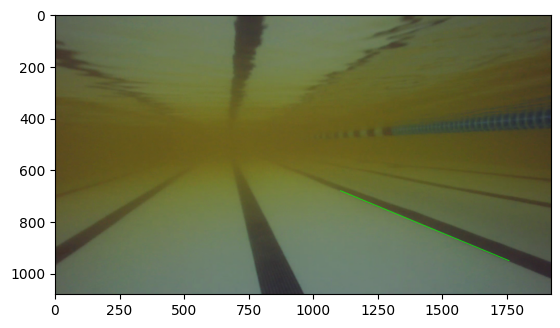

KeyboardInterrupt: 

In [3]:
vcap = cv2.VideoCapture("AUV_Vid.mkv")

frequency = 10
count = 0

while True:
    # print(count)
    ret, img = vcap.read()

    if not ret:
        break

    img = find_pool_lanes(img)

    if count % frequency == 0:
        plt.imshow(img)
        plt.show()

    count += 1

[Detection object:
tag_family = b'tag36h11'
tag_id = 60
hamming = 0
decision_margin = 24.732818603515625
homography = [[1.12852846e+01 1.35218628e+01 1.50604021e+02]
 [4.12931891e-01 1.34012105e+01 9.97275963e+01]
 [7.54358942e-03 3.97360209e-02 1.00000000e+00]]
center = [150.60402144  99.72759634]
corners = [[148.07374573 109.20044708]
 [167.49220276 108.4158783 ]
 [153.30262756  89.62454987]
 [132.03965759  90.17698669]]
pose_R = None
pose_t = None
pose_err = None
, Detection object:
tag_family = b'tag36h11'
tag_id = 82
hamming = 0
decision_margin = 24.04063606262207
homography = [[ 8.02054019e+00  3.10314575e+00  4.66621306e+02]
 [-8.49221724e-01  1.06309763e+01  8.20201682e+01]
 [-3.96118917e-03  1.89261753e-02  1.00000000e+00]]
center = [466.62130564  82.02016819]
corners = [[451.37316895  91.40827179]
 [470.70095825  90.44836426]
 [482.58377075  72.19226074]
 [462.41769409  73.33588409]]
pose_R = None
pose_t = None
pose_err = None
, Detection object:
tag_family = b'tag36h11'
tag_

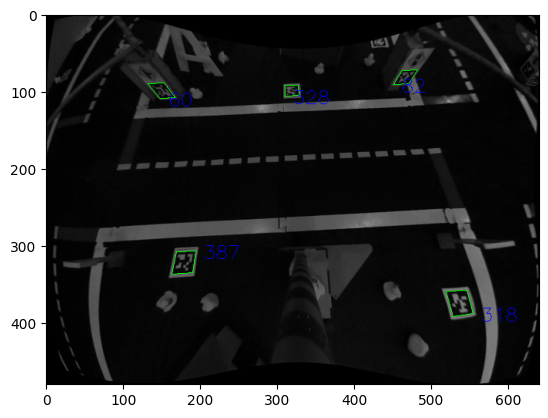

In [30]:
from dt_apriltags import Detector

img = cv2.imread("test_image.png", cv2.IMREAD_GRAYSCALE)
at_detector = Detector(
    families="tag36h11",
    nthreads=1,
    quad_decimate=1.0,
    quad_sigma=0.0,
    refine_edges=1,
    decode_sharpening=0.25,
    debug=0,
)
tags = at_detector.detect(
    img, estimate_tag_pose=False, camera_params=None, tag_size=None
)

print(tags)

color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
for tag in tags:
    for idx in range(len(tag.corners)):
        cv2.line(
            color_img,
            tuple(tag.corners[idx - 1, :].astype(int)),
            tuple(tag.corners[idx, :].astype(int)),
            (0, 255, 0),
        )

    cv2.putText(
        color_img,
        str(tag.tag_id),
        org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.8,
        color=(0, 0, 255),
    )

plt.imshow(color_img)